In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Deep Learning Project

/content/drive/MyDrive/Deep Learning Project


In [ ]:
import zipfile
import os

path = '/content/drive/MyDrive/Deep Learning Project/Cardamom_Plant_Dataset_Chinnahalli_1724-20240610T160243Z-001.zip'

data = '/content/drive/MyDrive/Deep Learning Project'

os.makedirs(data, exist_ok=True)

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(data)

print("Successfully.")


In [2]:
import os
import shutil
import random

base_dir = "/content/drive/MyDrive/Deep Learning Project/Cardamom_Plant_Dataset_Chinnahalli_1724"
output_dir = "/content/drive/MyDrive/Deep Learning Project/data/cardamom_dataset"

train_ratio, val_ratio, test_ratio = 0.8, 0.1, 0.1

os.makedirs(output_dir, exist_ok=True)

for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)

    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        total_images = len(images)
        train_end = int(total_images * train_ratio)
        val_end = train_end + int(total_images * val_ratio)

        train_files = images[:train_end]
        val_files = images[train_end:val_end]
        test_files = images[val_end:]

        for split in ["train", "val", "test"]:
            os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

        for split, file_list in zip(["train", "val", "test"], [train_files, val_files, test_files]):
            class_split_path = os.path.join(output_dir, split, class_name)

            for file in file_list:
                src_path = os.path.join(class_path, file)
                dest_path = os.path.join(class_split_path, file)
                shutil.copy(src_path, dest_path)

print("Dataset split and structured successfully!")


Dataset split and structured successfully!


In [3]:
from IPython.display import Image, display
import os
import cv2
import random
import matplotlib.pyplot as plt

output_folder = '/content/drive/MyDrive/Deep Learning Project/data/cardamom_dataset'

def display_images_side_by_side(images, titles, fig_size=(15, 5)):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=fig_size)
    for i in range(num_images):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
        axes[i].set_title(titles[i])
    plt.show()

def display_one_image_per_class(folder, resize_width=150, resize_height=150):
    images_to_display = []
    titles = []
    classes = os.listdir(folder)
    for class_name in classes:
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            images = os.listdir(class_folder)
            if len(images) > 0:
                random_image = random.choice(images)
                image_path = os.path.join(class_folder, random_image)
                image = cv2.imread(image_path)
                resized_image = cv2.resize(image, (resize_width, resize_height))
                images_to_display.append(resized_image)
                titles.append(f"Class: {class_name}")
                if len(images_to_display) == 3:  # Display one image from each of the three folders
                    break
    display_images_side_by_side(images_to_display, titles)

print("Training Set:")
display_one_image_per_class(os.path.join(output_folder, 'train'))

print("\nValidation Set:")
display_one_image_per_class(os.path.join(output_folder, 'val'))

print("\nTest Set:")
display_one_image_per_class(os.path.join(output_folder, 'test'))


Output hidden; open in https://colab.research.google.com to view.

In [4]:
import os

output_folder = '/content/drive/MyDrive/Deep Learning Project/data/cardamom_dataset'

def count_images_in_folder(folder):
    total_images = 0
    classes = os.listdir(folder)
    for class_name in classes:
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            images = os.listdir(class_folder)
            total_images += len(images)
    return total_images

train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')
val_folder = os.path.join(output_folder, 'val')

num_train_images = count_images_in_folder(train_folder)
num_test_images = count_images_in_folder(test_folder)
num_val_images = count_images_in_folder(val_folder)

print(f"Number of images in training set: {num_train_images}")
print(f"Number of images in test set: {num_test_images}")
print(f"Number of images in validation set: {num_val_images}")


Number of images in training set: 1378
Number of images in test set: 174
Number of images in validation set: 172


In [7]:
%cd /content/drive/MyDrive/Deep Learning Project

/content/drive/MyDrive/Deep Learning Project


In [8]:
!python -W ignore u2net_SegmentFolders.py --apply_mask True --batch_size 4 --output_size 224

Segmenting:- cardamom_dataset
Copied Already Segmented to output data/cardamom_dataset/train/Blight1000
Copied Already Segmented to output data/cardamom_dataset/val/Blight1000
Copied Already Segmented to output data/cardamom_dataset/test/Blight1000


In [9]:
%matplotlib inline
import cv2
import torch
import u2net_util
import numpy as np
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
from torchvision import transforms
from u2net_util import U2NetPrediction,RescaleT

In [20]:
test_imageDir = '/content/drive/MyDrive/Deep Learning Project/data/cardamom_dataset/test/Healthy_1000/Healthy (521).jpg'
semanticSegmenter = U2NetPrediction()
semanticSegmenter.transform = transforms.Compose([RescaleT(320),transforms.ToTensor()])
image = io.imread(test_imageDir)
height,width = image.shape[:2]
mask = semanticSegmenter.semanticSegmentation(image = image,apply_mask=False)
masked = semanticSegmenter.semanticSegmentation(image = image,apply_mask=True)
S = semanticSegmenter.S

In [21]:
original = cv2.resize(image,(width,height))
mask = cv2.resize(mask,(width,height))
mask = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
masked = cv2.resize(masked,(width,height))

Visualization


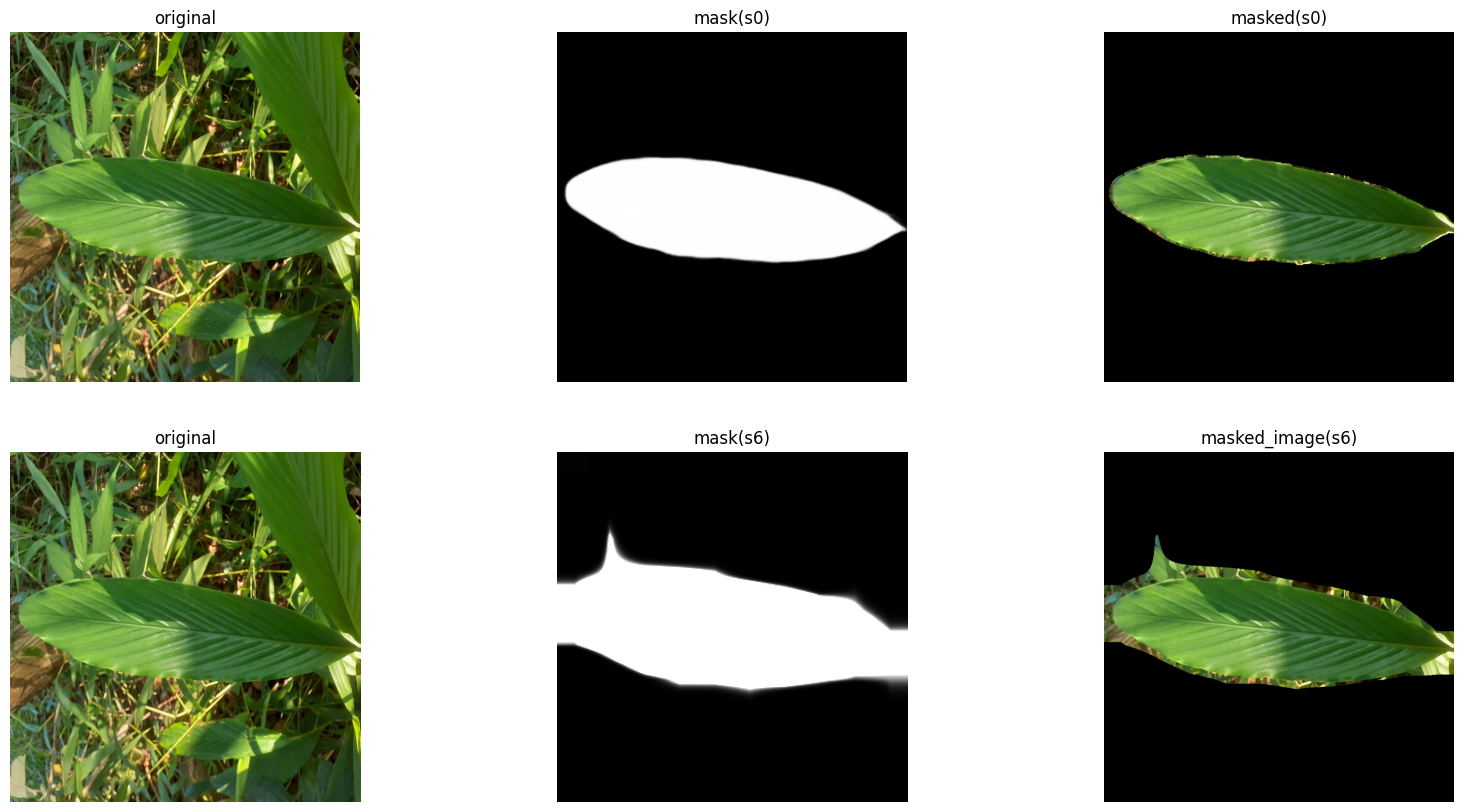

In [22]:
temp = S[6]
temp = semanticSegmenter.normPRED(temp[:,0,:,:]).squeeze().cpu().data.numpy() * 255

mask_s6 = cv2.resize(temp,(width,height)).astype(np.uint8)
masked_image_s6 =  cv2.bitwise_and(original,original,mask = mask_s6)

fig = plt.figure(figsize=(20, 10),dpi=100)
rows = 2
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(image)
plt.axis('off')
plt.title("original")

fig.add_subplot(rows, columns, 2)
plt.imshow(mask)
plt.axis('off')
plt.title("mask(s0)")

fig.add_subplot(rows, columns, 3)
plt.imshow(masked)
plt.axis('off')
plt.title("masked(s0)")
cv2.imwrite("sample_masked(s0).jpg", masked)

cv2.imwrite("sample_masked(s6).jpg", masked_image_s6)

fig.add_subplot(rows, columns, 4)
plt.imshow(image)
plt.axis('off')
plt.title("original")

mask_s1 = cv2.cvtColor(temp, cv2. COLOR_GRAY2RGB)
fig.add_subplot(rows, columns, 5)
plt.imshow(mask_s1)
plt.axis('off')
plt.title("mask(s6)")

fig.add_subplot(rows, columns, 6)
plt.imshow(masked_image_s6)
plt.axis('off')
plt.title("masked_image(s6)")

print("Visualization")

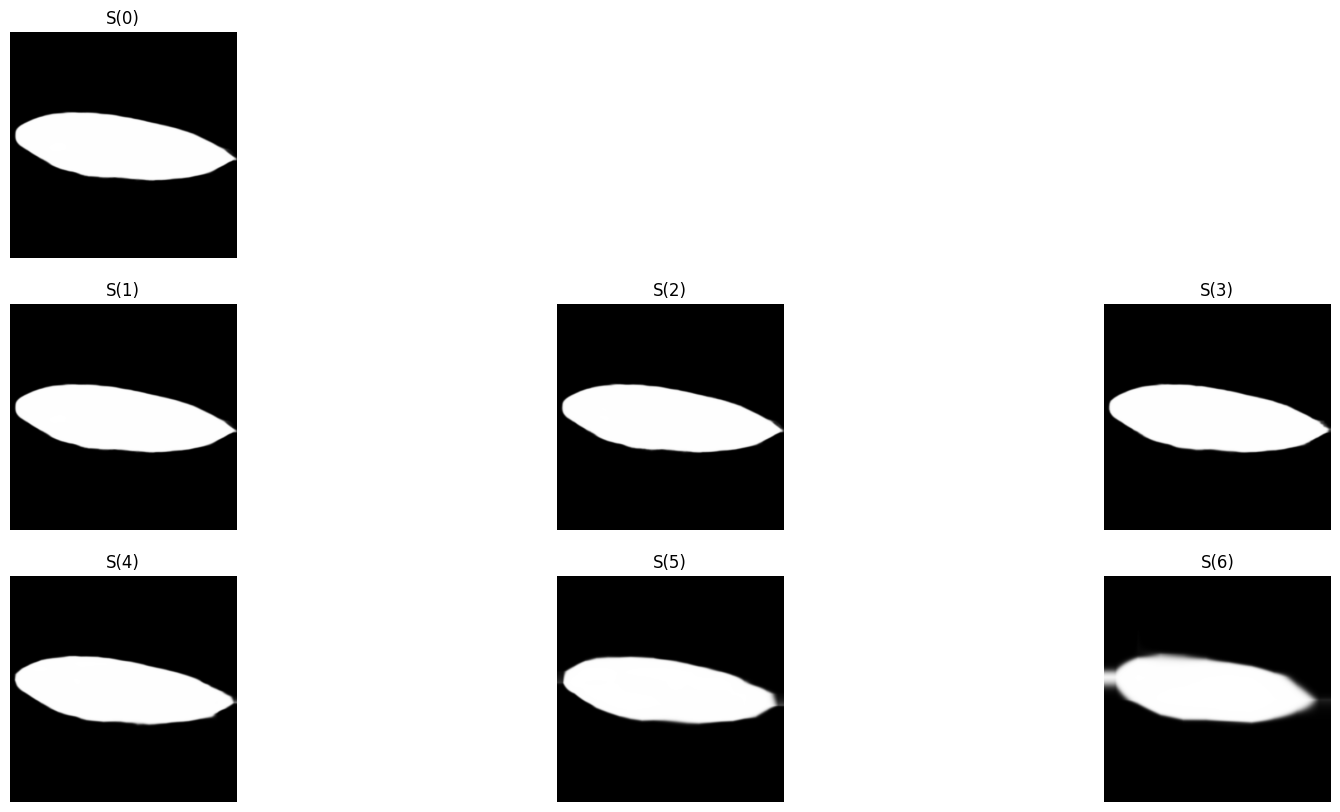

In [23]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10),dpi=100)
rows = 3
columns = 3
j = 1
k = 0
for i in S:
  i = semanticSegmenter.normPRED(i[:,0,:,:]).squeeze().cpu().data.numpy() * 255
  i = cv2.resize(i,(width,height),interpolation = cv2.INTER_AREA)
  i = i.astype(np.uint8)
  i = cv2.resize(i,(width//2,height//2))
  i = cv2.cvtColor(i, cv2. COLOR_GRAY2RGB)
  fig.add_subplot(rows, columns, j)
  plt.imshow(i)
  plt.axis('off')
  plt.title("S("+str(k)+")")
  if j==1:
    j=j+2
  j=j+1
  k=k+1
